In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import copy

from test_simplify import test_basic, load_net, batch_predict
from test_batch import collect_predict,adaptive_chain_smoother,load_predict

In [2]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [3]:
def plot_trace(x,y, alpha=1.0):
    n = x.shape[0]
    plt.plot(x[:n//3],y[:n//3],'-o',color='r', alpha=alpha)
    plt.plot(x[n//3:n//3*2],y[n//3:n//3*2],'-o',color='g', alpha=alpha)
    plt.plot(x[n//3*2:],y[n//3*2:],'-o',color='b', alpha=alpha)


In [4]:
net = load_net('weights/ssd300_hor_2.pth')

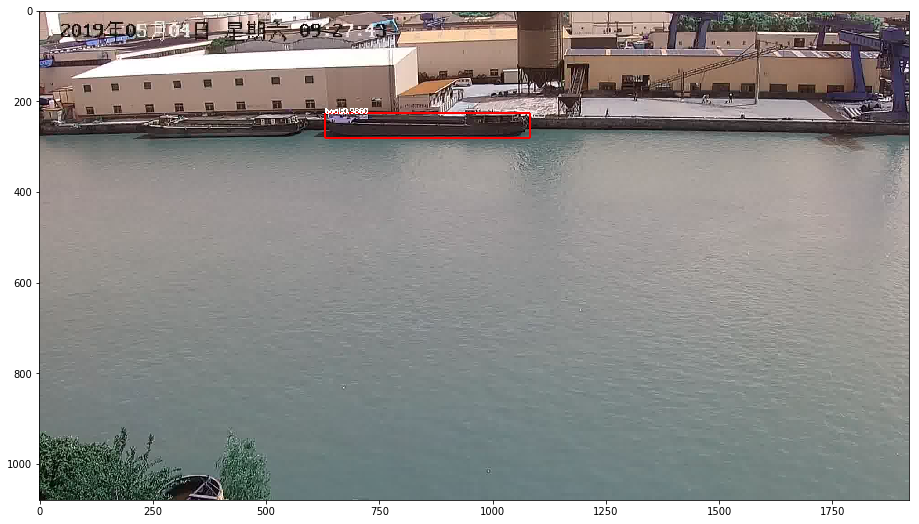

In [5]:
processed = test_basic(net, r'hiv00803_frames\thumb00088.jpg')
plt.figure(figsize=(16,9))
plt.imshow(processed)

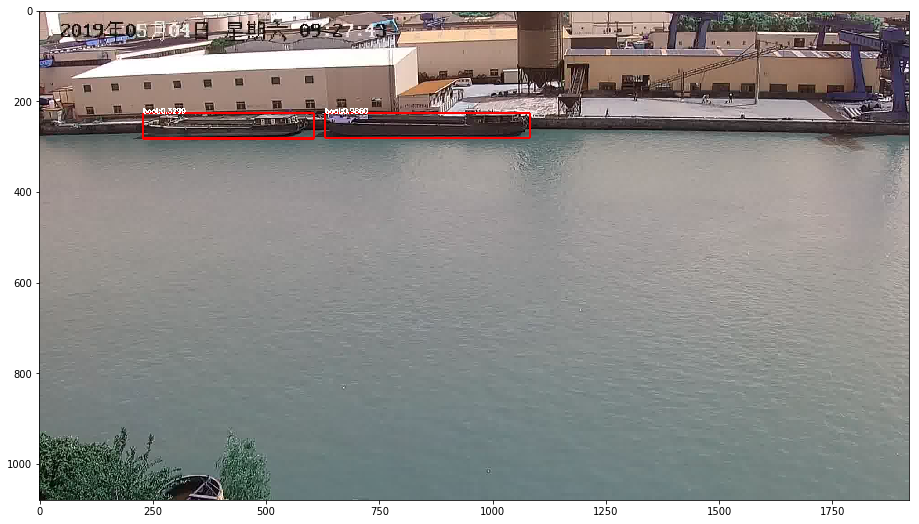

In [6]:
processed = test_basic(net, r'hiv00803_frames\thumb00088.jpg', threshold=0.15)
plt.figure(figsize=(16,9))
plt.imshow(processed)

In [7]:
smoother = lambda arr: adaptive_chain_smoother(arr, F=6)

In [8]:
loaded_raw = load_predict('hiv00803_cache')

In [9]:
loaded = copy.deepcopy(loaded_raw)
collected = collect_predict(loaded, chain_smoother=smoother, jump_tol=60, verbose=True)
sorted([len(chain) for chain in collected['chain_list']], reverse=True)

22 chain detected


[12920,
 12896,
 2389,
 2259,
 2244,
 2220,
 1359,
 1097,
 1052,
 1035,
 654,
 424,
 152,
 91,
 43,
 21,
 12,
 12,
 9,
 9,
 4,
 1]

12920


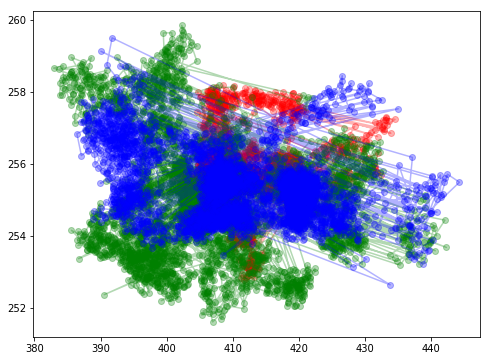

12896


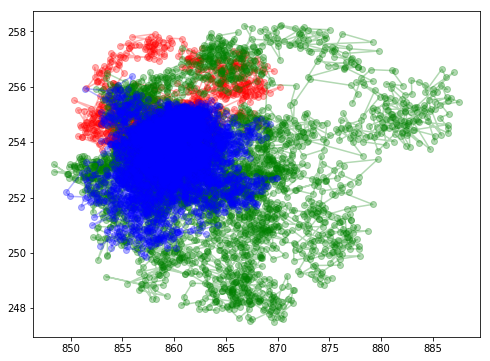

2389


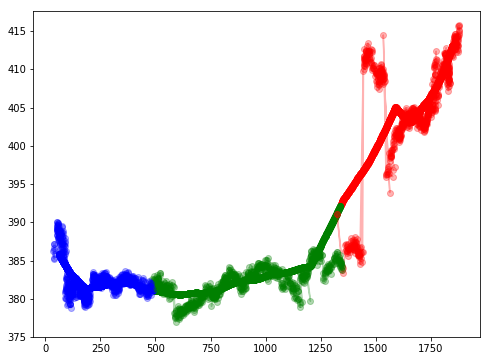

2259


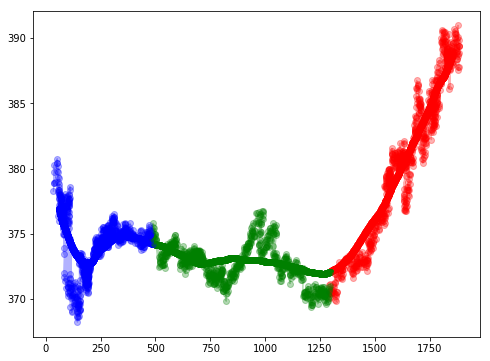

2244


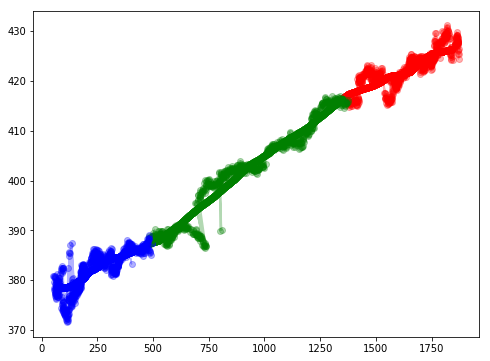

2220


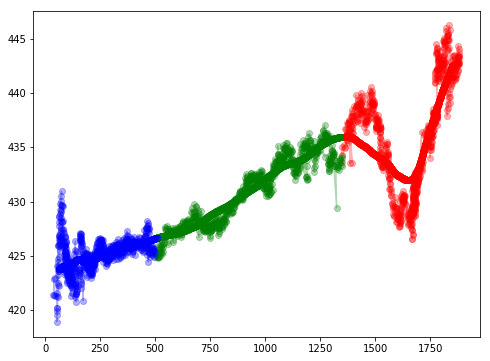

1359


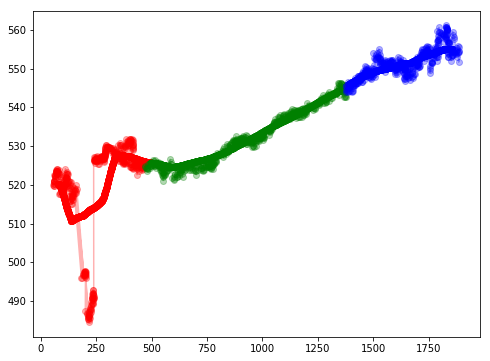

1097


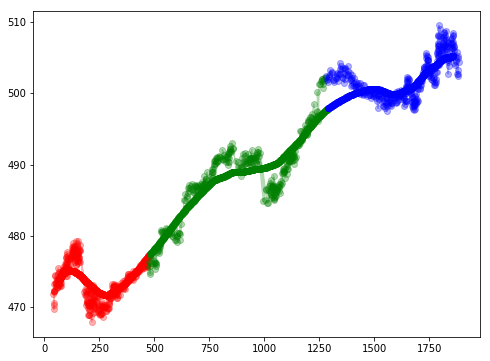

1052


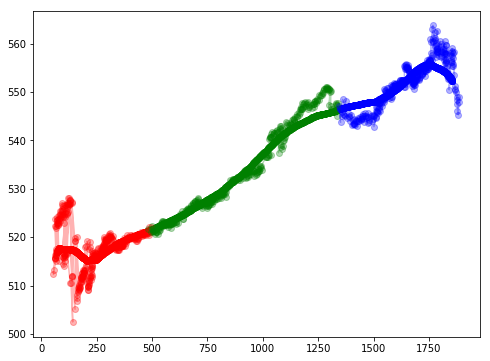

1035


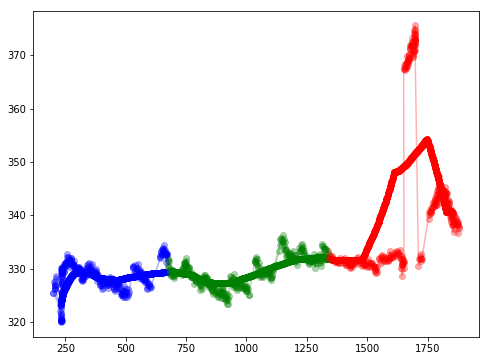

654


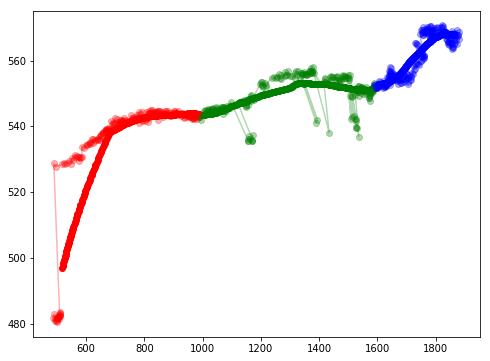

424


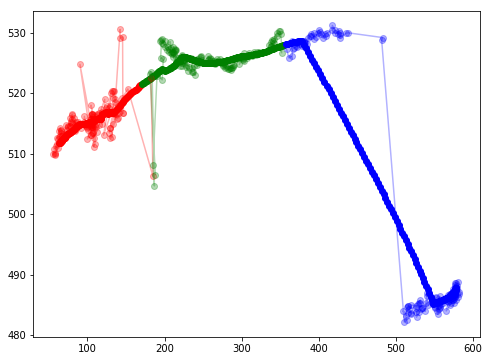

152


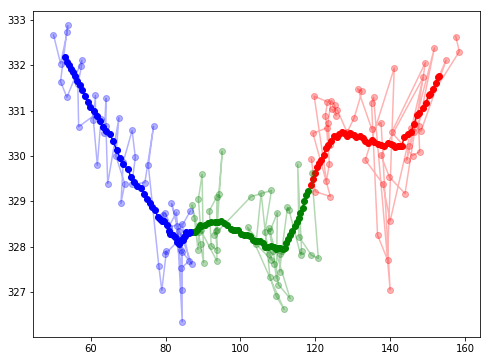

91


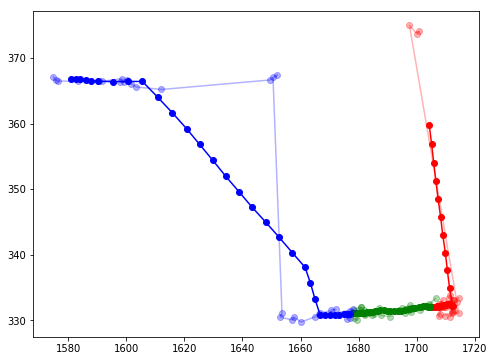

43


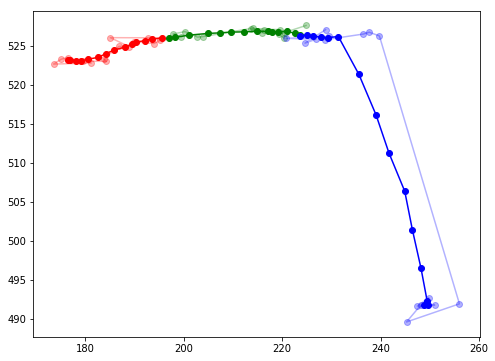

21


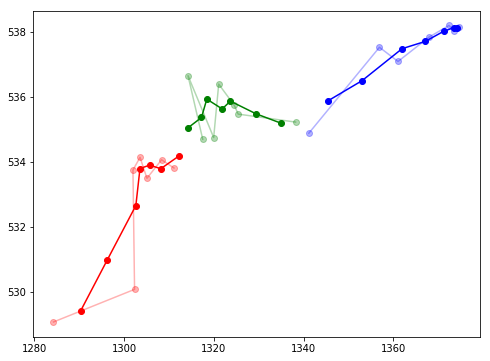

12


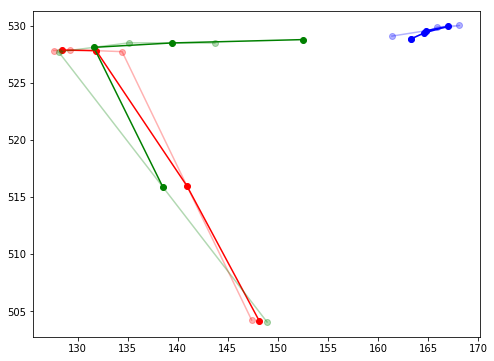

12


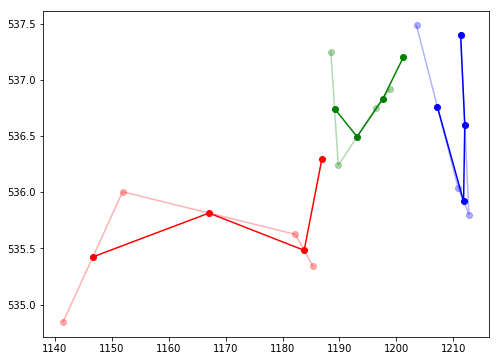

9


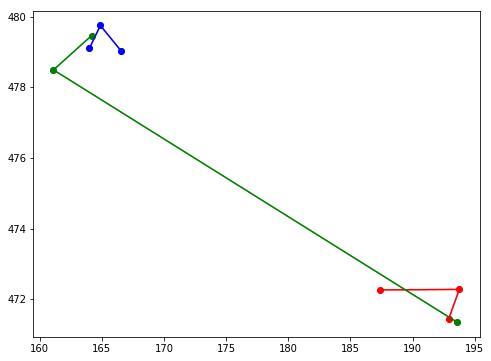

9


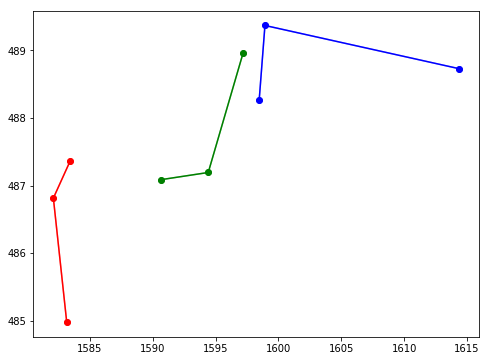

4


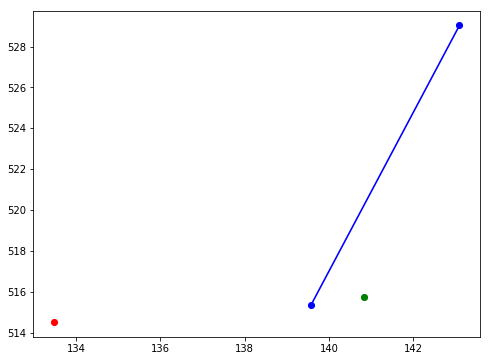

In [10]:
for chain in sorted([chain for chain in collected['chain_list']], reverse=True, key=len)[:21]:
    pt_arr = np.array([box['pt'] for box in chain])
    pt_smoothed_arr = np.array([box['pt_smoothed'] for box in chain])
    if len(pt_arr) <2:
        print('suppressed')
        continue
    print(len(pt_arr))
    x,y = pt_arr[:,::2].mean(axis=1),pt_arr[:,1::2].mean(axis=1)
    x_bar,y_bar = pt_smoothed_arr[:,::2].mean(axis=1),pt_smoothed_arr[:,1::2].mean(axis=1)
    
    plt.figure(figsize=(8,6))
    plot_trace(x_bar, y_bar)
    plot_trace(x,y, alpha=0.3)
    plt.show()

In [11]:
background_bgr = cv2.imread('hor_background2.jpg')
background = cv2.cvtColor(background_bgr, cv2.COLOR_BGR2RGB)

12920


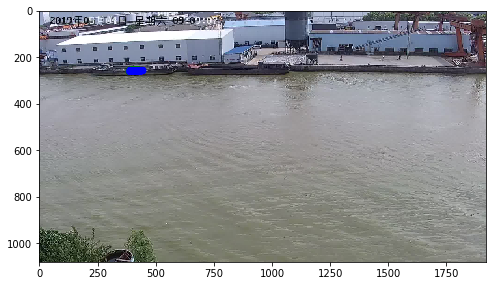

12896


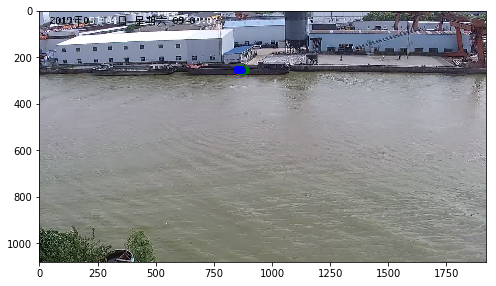

2389


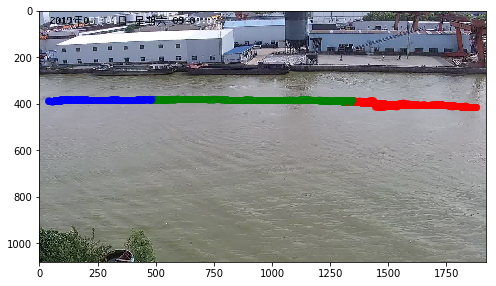

2259


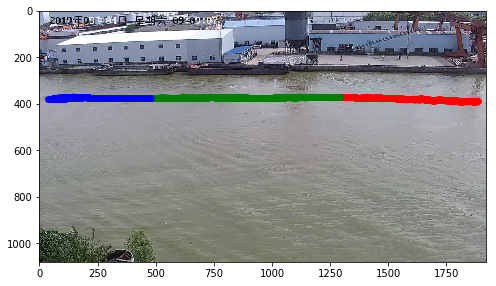

2244


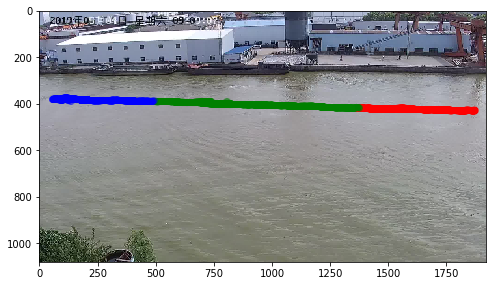

2220


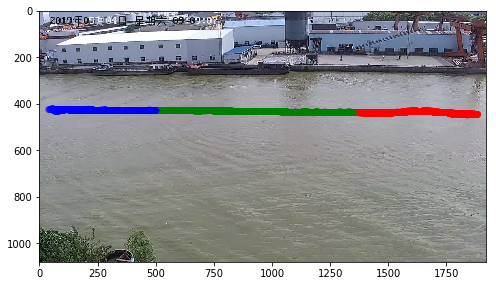

1359


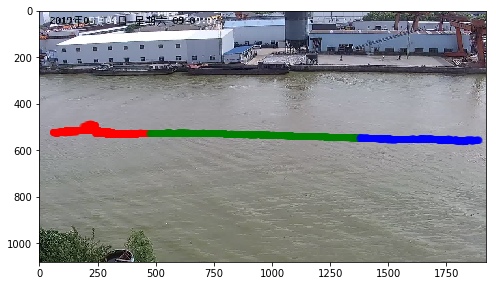

1097


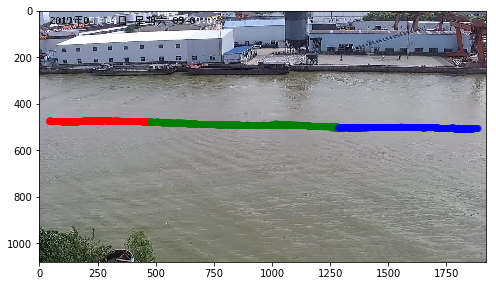

1052


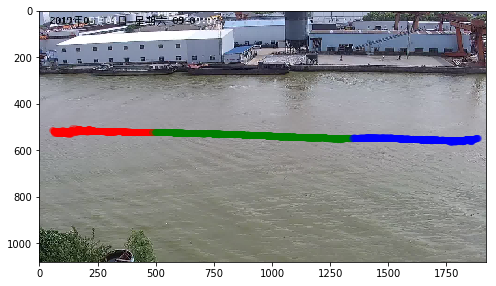

1035


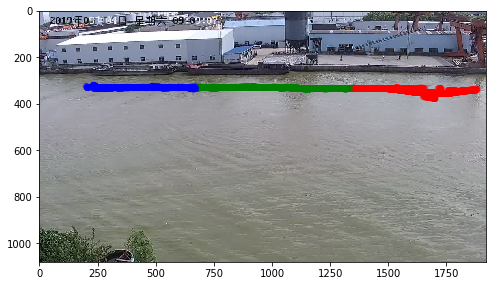

654


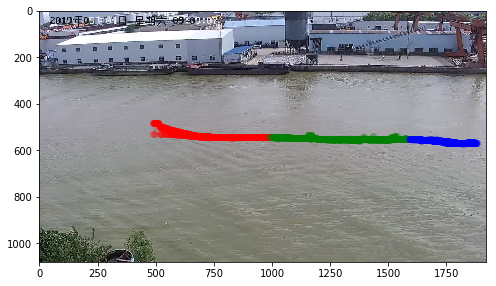

424


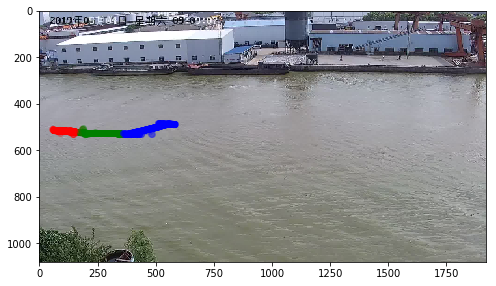

152


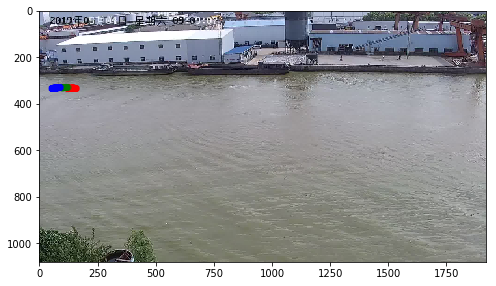

91


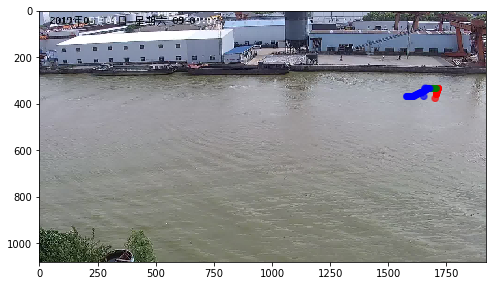

43


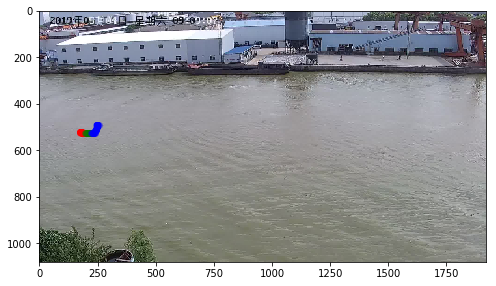

21


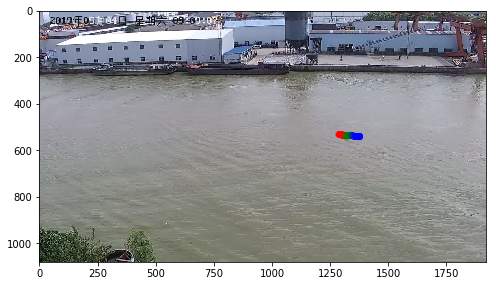

12


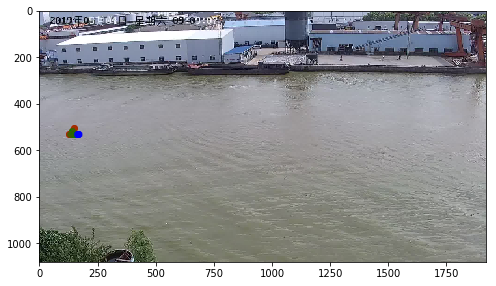

12


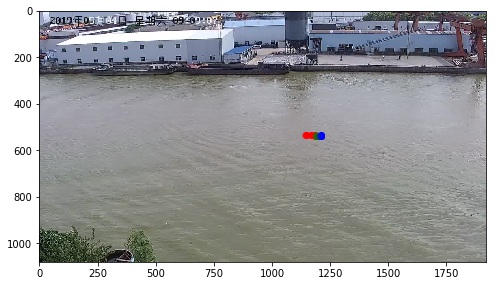

9


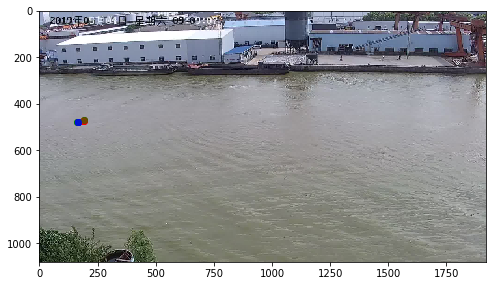

9


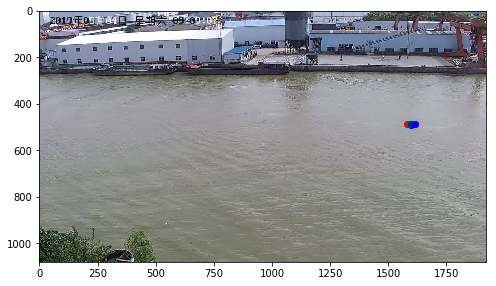

4


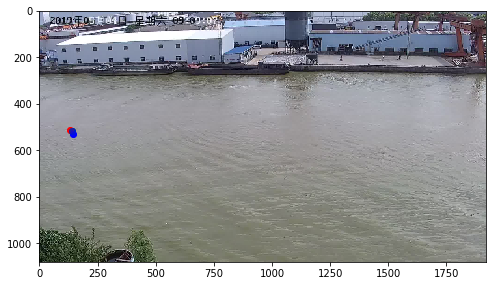

In [12]:
for chain in sorted([chain for chain in collected['chain_list']], reverse=True, key=len)[:21]:
    pt_arr = np.array([box['pt'] for box in chain])
    pt_smoothed_arr = np.array([box['pt_smoothed'] for box in chain])
    if len(pt_arr) <2:
        print('suppressed')
        continue
    print(len(pt_arr))
    x,y = pt_arr[:,::2].mean(axis=1),pt_arr[:,1::2].mean(axis=1)
    x_bar,y_bar = pt_smoothed_arr[:,::2].mean(axis=1),pt_smoothed_arr[:,1::2].mean(axis=1)
    
    plt.figure(figsize=(8,6))
    plot_trace(x_bar, y_bar)
    plot_trace(x,y, alpha=0.3)
    plt.imshow(background)
    plt.show()